Procesamiento del DataSet "fastfood.csv" de Kaggle:

In [7]:
import pandas as pd

df = pd.read_csv('fastfood.csv')
print(df.head())
print(df.info())

  restaurant                                       item  calories  cal_fat  \
0  Mcdonalds           Artisan Grilled Chicken Sandwich       380       60   
1  Mcdonalds             Single Bacon Smokehouse Burger       840      410   
2  Mcdonalds             Double Bacon Smokehouse Burger      1130      600   
3  Mcdonalds  Grilled Bacon Smokehouse Chicken Sandwich       750      280   
4  Mcdonalds   Crispy Bacon Smokehouse Chicken Sandwich       920      410   

   total_fat  sat_fat  trans_fat  cholesterol  sodium  total_carb  fiber  \
0          7      2.0        0.0           95    1110          44    3.0   
1         45     17.0        1.5          130    1580          62    2.0   
2         67     27.0        3.0          220    1920          63    3.0   
3         31     10.0        0.5          155    1940          62    2.0   
4         45     12.0        0.5          120    1980          81    4.0   

   sugar  protein  vit_a  vit_c  calcium  salad  
0     11     37.0    4.0

Presentación de gráficos:

1- Los diez items más caloricos de todos los registrados y sus calorias.
2- El ítem más calóricos de cada uno de los restaurantes con sus calorías y el nombre del ítem en la barra del gráfico.
3- El ítem con más proteína que contenga vitamina A, vitamina C y calcio, y que tenga la menor relación calorías-grasa entre los que cumplan esas condiciones.
4- El ítem con menos calorías, grasas totales, azúcar, colesterol, sodio y carbohidratos totales y de que restaurante és.
5- Mostrar la distribución de calorías de los ítems del restaurante McDonald's.
6- La cantidad de colesterol que varía entre la comida de los restaurantes.

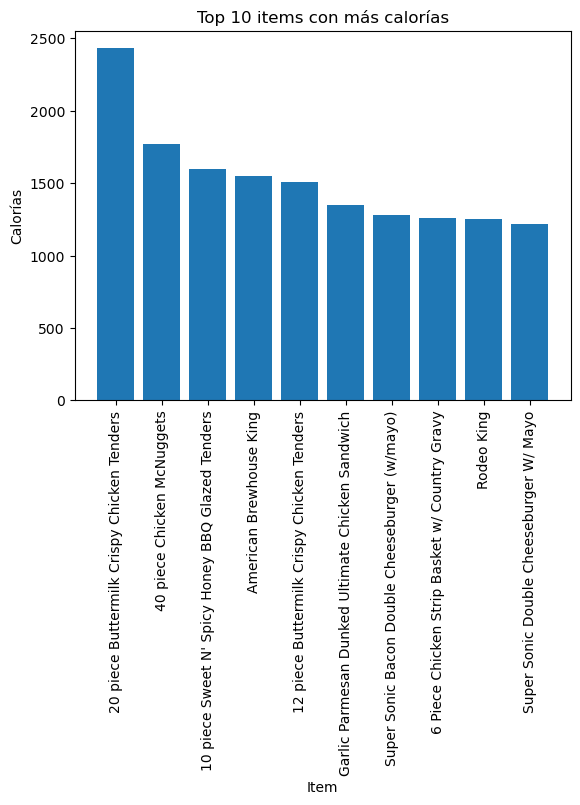

In [48]:
import matplotlib.pyplot as plt

top_calories = df.sort_values('calories', ascending=False).head(10)

plt.bar(top_calories['item'], top_calories['calories'])
plt.xticks(rotation=90)
plt.xlabel('Item')
plt.ylabel('Calorías')
plt.title('Top 10 items con más calorías')
plt.show()


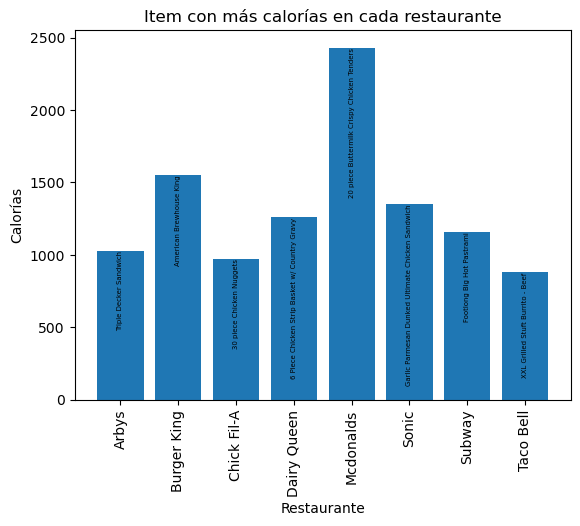

In [49]:
max_calories = df.loc[df.groupby('restaurant')['calories'].idxmax()].reset_index(drop=True)
plt.bar(max_calories['restaurant'], max_calories['calories'])
plt.xticks(rotation=90)
plt.xlabel('Restaurante')
plt.ylabel('Calorías')
plt.title('Item con más calorías en cada restaurante')
for i, v in enumerate(max_calories['item']):
    plt.text(i, max_calories['calories'][i], v, ha='center', va='top', fontsize=5, rotation=90)

plt.show()

In [50]:
df_vitamins = df[df['vit_a']>0]
df_vitamins = df_vitamins[df_vitamins['vit_c']>0]
df_vitamins = df_vitamins[df_vitamins['calcium']>0]

df_vitamins['Calorias por gramo de grasa'] = df_vitamins['calories']/df_vitamins['cal_fat']

max_protein_item = df_vitamins[df_vitamins['protein']==df_vitamins['protein'].max()]
max_protein_min_cal_fat_item = max_protein_item[max_protein_item['Calorias por gramo de grasa']==max_protein_item['Calorias por gramo de grasa'].min()]
result = max_protein_min_cal_fat_item['item'].iloc[0]

print(result)

10 piece Sweet N' Spicy Honey BBQ Glazed Tenders


In [39]:
df['Total Sum'] = df['calories']+df['total_fat']+df['sugar']+df['cholesterol']+df['sodium']+df['total_carb']
min_item = df[df['Total Sum']==df['Total Sum'].min()]
result = (min_item['item'].iloc[0], min_item['restaurant'].iloc[0])

print(result)

('Side Salad', 'Dairy Queen')


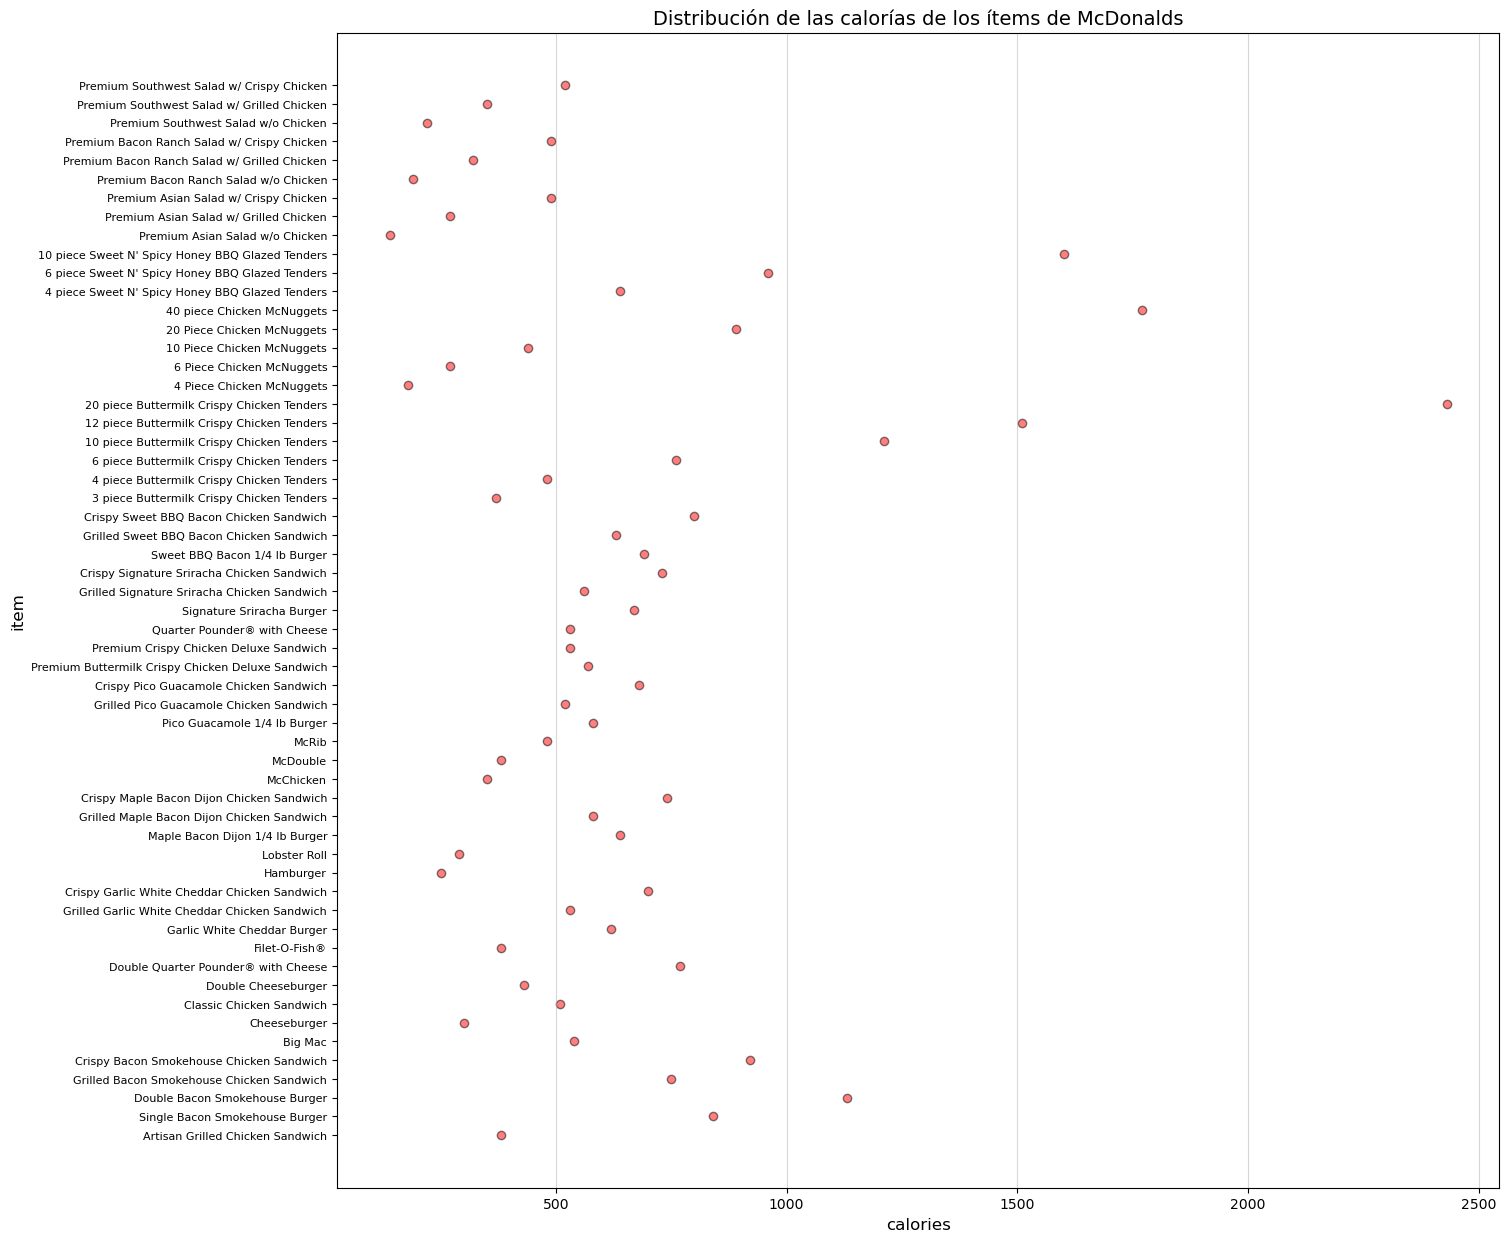

In [51]:
df_mcdonalds = df[df['restaurant']=='Mcdonalds']

plt.figure(figsize=(15,15))
plt.scatter(df_mcdonalds['calories'], df_mcdonalds['item'], alpha=0.5, color='red', edgecolor='black')
plt.title('Distribución de las calorías de los ítems de McDonalds', fontsize=14)
plt.xlabel('calories', fontsize=12)
plt.ylabel('item', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=8)
plt.grid(axis='x', alpha=0.5)
plt.show()

<AxesSubplot:title={'center':'La cantidad de colesterol que varía entre la comida de los restaurantes'}, xlabel='restaurant', ylabel='cholesterol'>

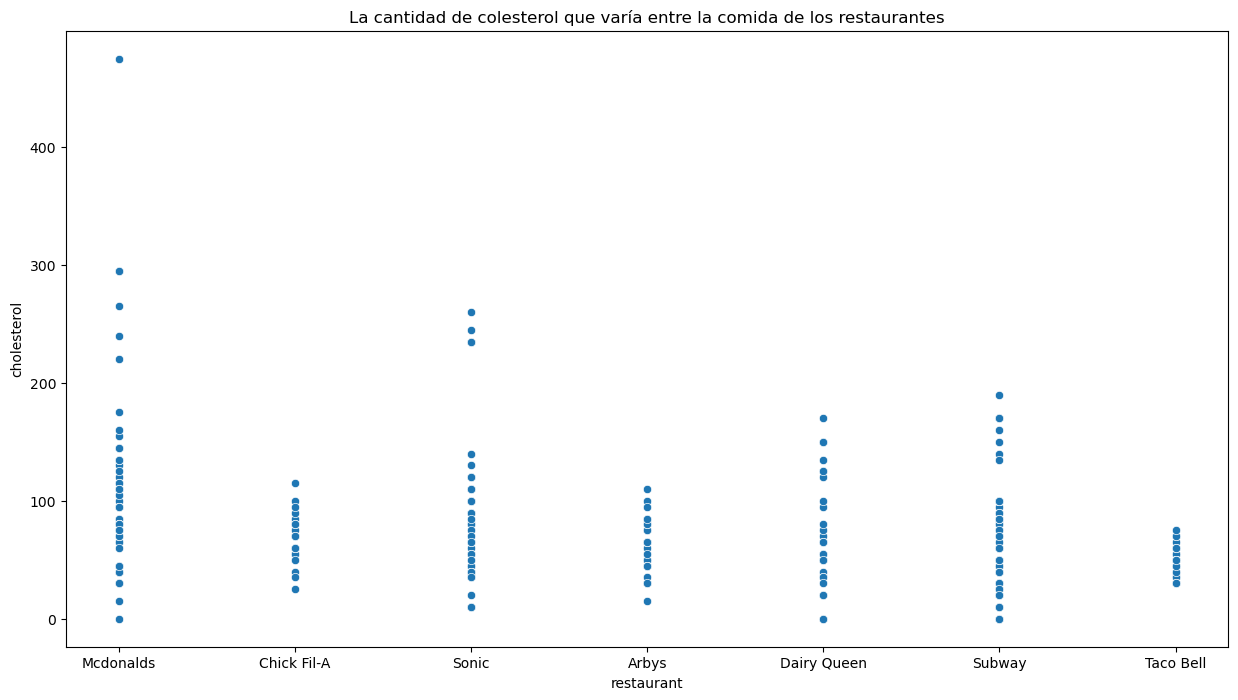

In [62]:
import seaborn as sns
plt.figure(figsize=(15,8))
plt.title("La cantidad de colesterol que varía entre la comida de los restaurantes")
sns.scatterplot(x=df['restaurant'],y=df['cholesterol'])

In [ ]:
Implementación de un modelo de machine learning que pretende identificar a qué restaurante pertenece un ítem en función de sus características nutricionales

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

df = df.dropna(axis=0)
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(1e-9)


X = df[['calories', 'total_fat', 'sat_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein']]
y = df['restaurant'].astype('category').cat.codes

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print('La precisión del modelo es del', round(accuracy*100, 2), '%')

La precisión del modelo es del 67.21 %


In [67]:
from sklearn.metrics import classification_report

num_classes = len(np.unique(y_test))

target_names = ['Mcdonalds', 'Burger King', 'Wendys', 'Taco Bell', 'KFC', 'Pizza Hut', 'Dominoes']

print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   Mcdonalds       0.14      0.33      0.20         3
 Burger King       1.00      0.33      0.50         6
      Wendys       0.50      0.12      0.20         8
   Taco Bell       0.50      0.70      0.58        10
         KFC       0.75      0.75      0.75        12
   Pizza Hut       0.81      0.93      0.87        14
    Dominoes       1.00      1.00      1.00         8

    accuracy                           0.67        61
   macro avg       0.67      0.60      0.59        61
weighted avg       0.72      0.67      0.66        61

